## importing Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Loading Both Dataset

In [3]:
sentiment = pd.read_csv("E:\\Trader-Sentiment-Analysis\\fear_greed_index.csv")
trades = pd.read_csv("E:\\Trader-Sentiment-Analysis\\historical_data.csv")


## basic Structure Of Dataset 

In [4]:
sentiment.shape

(2644, 4)

In [5]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [6]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [7]:
trades.shape

(211224, 16)

In [8]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [9]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [10]:
sentiment.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [11]:
trades.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

# 2.Cleaning and Preparing Market Sentiment Data
## 📌 Objective

- Before merging with trader data, we need to ensure the Fear & Greed dataset has correct date format and no structural issues.

## 2.1 Check for Missing Values

In [12]:
sentiment.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

- The output shows no missing values in any column.
- This means the sentiment dataset is complete and reliable for time-based analysis.

## 2.2 Check for Duplicate Records

In [13]:
sentiment.duplicated().sum()

np.int64(0)

- There are no duplicate rows, meaning each date has a unique sentiment value.
- This is important because we need one sentiment label per day for merging.

## 2.3 Convert Date Column to Datetime Format

In [14]:
sentiment['date'] = pd.to_datetime(sentiment['date'])

In [15]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


- The date column is now in datetime format, which allows proper time-based merging and analysis.

## 2.4 Simplify Sentiment Categories 

In [16]:
sentiment['sentiment_group'] = sentiment['classification'].apply(
    lambda x: 'Fear' if 'Fear' in x else 'Greed'
)

sentiment['sentiment_group'].value_counts()


sentiment_group
Greed    1355
Fear     1289
Name: count, dtype: int64

- We grouped sentiment into Fear and Greed to make comparison easier.
- This helps analyze trader behavior under negative vs positive market sentiment

## 2.5 Keep Only Necessary Columns

In [17]:
sentiment = sentiment[['date', 'sentiment_group', 'value']]
sentiment.head()


,date,sentiment_group,value
0,2018-02-01,Fear,30
1,2018-02-02,Fear,15
2,2018-02-03,Fear,40
3,2018-02-04,Fear,24
4,2018-02-05,Fear,11


### We retain:

- date → for merging

- sentiment_group → Fear vs Greed

- value → sentiment strength (optional for deeper analysis)

- The dataset is now clean and ready to merge with trading data.

# 3.Cleaning and Preparing Trader Data
## 📌 Objective

- Prepare the trading dataset for analysis by fixing column names, converting timestamps, and ensuring numeric fields are usable.

## 3.1 Standardize Column Names

In [18]:
trades.columns = trades.columns.str.strip().str.lower().str.replace(' ', '_')
trades.columns


Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp'],
      dtype='object')

- Column names are now easier to reference in code (e.g., closed_pnl, size_usd, timestamp_ist).
- This improves readability and reduces errors in later steps.

## 3.2 Check for Missing Values

In [19]:
trades.isnull().sum()


account             0
coin                0
execution_price     0
size_tokens         0
size_usd            0
side                0
timestamp_ist       0
start_position      0
direction           0
closed_pnl          0
transaction_hash    0
order_id            0
crossed             0
fee                 0
trade_id            0
timestamp           0
dtype: int64

- There are no missing values in key columns, meaning all trades contain necessary details like price, size, and PnL.

## 3.3 Convert Timestamp to Datetime

In [20]:
trades['timestamp_ist'] = pd.to_datetime(trades['timestamp_ist'], format='%d-%m-%Y %H:%M')
trades['date'] = trades['timestamp_ist'].dt.date

trades[['timestamp_ist','date']].head()


,timestamp_ist,date
0,2024-12-02 22:50:00,2024-12-02
1,2024-12-02 22:50:00,2024-12-02
2,2024-12-02 22:50:00,2024-12-02
3,2024-12-02 22:50:00,2024-12-02
4,2024-12-02 22:50:00,2024-12-02


- Each trade now has a date column, allowing us to aggregate trades at a daily level and merge with daily sentiment.

## 3.4 Ensure Numeric Columns Are Correct Type

In [21]:
numeric_cols = ['execution_price', 'size_tokens', 'size_usd', 
                'start_position', 'closed_pnl', 'fee']

trades[numeric_cols] = trades[numeric_cols].apply(pd.to_numeric, errors='coerce')
trades[numeric_cols].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   execution_price  211224 non-null  float64
 1   size_tokens      211224 non-null  float64
 2   size_usd         211224 non-null  float64
 3   start_position   211224 non-null  float64
 4   closed_pnl       211224 non-null  float64
 5   fee              211224 non-null  float64
dtypes: float64(6)
memory usage: 9.7 MB


- All financial metrics are confirmed as numeric, ensuring correct calculations for PnL, trade size, and fees.

## 3.5 Create Trade Outcome Column (Win / Loss)

In [22]:
trades['win'] = trades['closed_pnl'] > 0
trades['win'].value_counts()


win
False    124355
True      86869
Name: count, dtype: int64

- We classify each trade as a winning or losing trade, which will later help calculate win rates across sentiment conditions.

## 3.6 Basic Sanity Check of PnL

In [23]:
trades['closed_pnl'].describe()


count    211224.000000
mean         48.749001
std         919.164828
min     -117990.104100
25%           0.000000
50%           0.000000
75%           5.792797
max      135329.090100
Name: closed_pnl, dtype: float64

- This summary confirms the range of profits and losses.
- Large negative values may indicate liquidation events, which are important when analyzing risk behavior.

# 4.Merging Trader Data with Market Sentiment
##📌 Objective

- The goal of this step is to combine trader activity with daily market sentiment.
- This allows us to analyze how trader behavior and performance differ during Fear and Greed market conditions.

## 4.1 Ensure Date Format is Consistent in Both Datasets

In [24]:
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date
trades['date'] = pd.to_datetime(trades['date']).dt.date


- Both datasets now use the same date format, ensuring an accurate merge.
- This prevents mismatches when aligning trading activity with daily sentiment.

## 4.2 Merge the Datasets

In [25]:
merged = trades.merge(sentiment[['date', 'sentiment_group']], 
                      on='date', 
                      how='left')

merged.head()


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date,win,sentiment_group
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,False,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,False,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,False,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,False,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,False,Greed


- Each trade is now tagged with the market sentiment (Fear or Greed) of that day.
- This is the key dataset we will use for all further analysis.

## 4.3 Check Merge Success

In [26]:
merged['sentiment_group'].isnull().sum()


np.int64(6)

-If there are missing values, it means some trade dates fall outside the sentiment dataset range.

## 4.3.1 View Rows with Missing Sentiment 

In [27]:
merged[merged['sentiment_group'].isnull()][['date', 'account', 'closed_pnl']].head()


,date,account,closed_pnl
727,2024-10-26,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,11655.000000
728,2024-10-26,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,13901.794130
729,2024-10-26,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,9737.981968
730,2024-10-26,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,746.228144
731,2024-10-26,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,54.481040


- These rows represent trades for which no market sentiment data was available.
- Since sentiment is a key variable for our analysis, we must handle them before proceeding.

## 4.3.2 Check Date Range of Both Datasets

In [28]:
print("Sentiment Date Range:", sentiment['date'].min(), "to", sentiment['date'].max())
print("Trade Date Range:", merged['date'].min(), "to", merged['date'].max())


Sentiment Date Range: 2018-02-01 to 2025-05-02
Trade Date Range: 2023-05-01 to 2025-05-01


- If the trade date range extends beyond the sentiment date range, those extra days explain the missing sentiment labels.

## 4.3.3 Remove Rows with Missing Sentiment

In [29]:
merged = merged.dropna(subset=['sentiment_group'])


In [30]:
merged['sentiment_group'].isnull().sum()


np.int64(0)

- After removing unmatched rows, all trades now have a valid Fear/Greed label.
- This ensures clean and consistent analysis moving forward.

# 5.Creating Key Trading Metrics
## 📌 Objective

- We now create meaningful trader behavior and performance indicators that will help us compare activity during Fear vs Greed market conditions.

## 5.1 Daily PnL per Trader

In [31]:
daily_pnl = merged.groupby(['account', 'date'])['closed_pnl'].sum().reset_index()
daily_pnl.head()


,account,date,closed_pnl
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1


- This metric shows how much profit or loss each trader made per day.
- It helps us analyze whether trader performance changes based on market sentiment.

## 5.2 Overall Win Rate per Trader

In [32]:
win_rate = merged.groupby('account')['win'].mean().reset_index()
win_rate.columns = ['account', 'win_rate']
win_rate.head()


,account,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,0.359612
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,0.442720
2,0x271b280974205ca63b716753467d5a371de622ab,0.301917
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,0.438585
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,0.519914


- Win rate represents the proportion of profitable trades for each trader.
- A higher win rate indicates more consistent performance.

## 5.3 Average Trade Size (USD)

In [33]:
avg_trade_size = merged.groupby('account')['size_usd'].mean().reset_index()
avg_trade_size.columns = ['account', 'avg_trade_size_usd']
avg_trade_size.head()


,account,avg_trade_size_usd
0,0x083384f897ee0f19899168e3b1bec365f52a9012,16159.576734
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,1653.226327
2,0x271b280974205ca63b716753467d5a371de622ab,8893.000898
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,507.626933
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3138.894782


- This shows how large traders’ positions typically are.
- It helps us understand whether traders take bigger risks during Greed or become cautious during Fear.

## 5.4 Daily Number of Trades (Market Activity)

In [34]:
daily_trades = merged.groupby('date').size().reset_index(name='num_trades')
daily_trades.head()

,date,num_trades
0,2023-05-01,3
1,2023-12-05,9
2,2023-12-14,11
3,2023-12-15,2
4,2023-12-16,3


- This measures overall trading activity per day.
 - Higher trade counts during Greed could indicate overconfidence, while spikes during Fear may show panic trading.

## 5.5 Long vs Short Ratio

In [35]:
long_short = merged.groupby(['date', 'side']).size().unstack(fill_value=0)
long_short['long_ratio'] = long_short.get('BUY', 0) / (long_short.get('BUY', 0) + long_short.get('SELL', 0))
long_short.head()


side,BUY,SELL,long_ratio
date,,,
2023-05-01,3,0,1.000000
2023-12-05,7,2,0.777778
2023-12-14,5,6,0.454545
2023-12-15,2,0,1.000000
2023-12-16,3,0,1.000000


- This ratio shows whether traders are more biased toward long positions or short positions.
- We can later compare if traders become more bearish during Fear periods.

## 5.6 Average PnL per Trade

In [36]:
avg_pnl_trade = merged.groupby('account')['closed_pnl'].mean().reset_index()
avg_pnl_trade.columns = ['account', 'avg_pnl_per_trade']
avg_pnl_trade.head()


,account,avg_pnl_per_trade
0,0x083384f897ee0f19899168e3b1bec365f52a9012,419.127768
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,6.577654
2,0x271b280974205ca63b716753467d5a371de622ab,-18.492043
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,9.951530
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,52.071011


- This indicates the typical profitability per trade for each trader, helping us identify consistent vs inconsistent performers.

## 5.7 Trading Fees per Trader (Risk Activity Proxy)

In [37]:
fees_per_trader = merged.groupby('account')['fee'].sum().reset_index()
fees_per_trader.columns = ['account', 'total_fees_paid']
fees_per_trader.head()


,account,total_fees_paid
0,0x083384f897ee0f19899168e3b1bec365f52a9012,7405.312304
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2729.837889
2,0x271b280974205ca63b716753467d5a371de622ab,9280.982850
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,2218.367366
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3108.196722


- Higher total fees often indicate higher trading frequency or larger positions, which may reflect aggressive trading behavior.

# 6.Performance Comparison — Fear vs Greed
## 📌 Objective

- Analyze how trader profitability and success rate differ between Fear and Greed market conditions.

## 6.1 Average PnL per Trade by Sentiment

In [38]:
pnl_by_sentiment = merged.groupby('sentiment_group')['closed_pnl'].mean()
pnl_by_sentiment


sentiment_group
Fear     49.212077
Greed    48.118246
Name: closed_pnl, dtype: float64

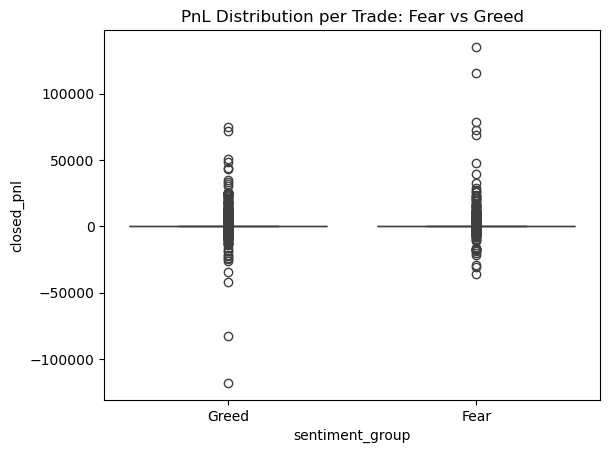

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='sentiment_group', y='closed_pnl', data=merged)
plt.title("PnL Distribution per Trade: Fear vs Greed")
plt.show()


- This compares profitability of trades during Fear and Greed days.
- If Greed shows higher median PnL, traders perform better in optimistic markets.
- If Fear has deeper losses, it suggests emotional or panic-driven trading.

## 6.2 Win Rate by Sentiment

In [40]:
winrate_sentiment = merged.groupby('sentiment_group')['win'].mean()
winrate_sentiment


sentiment_group
Fear     0.407871
Greed    0.413444
Name: win, dtype: float64

- Win rate shows the proportion of profitable trades.
- A lower win rate during Fear may indicate traders struggle in volatile or uncertain markets.

## 6.3 Total Daily PnL by Sentiment

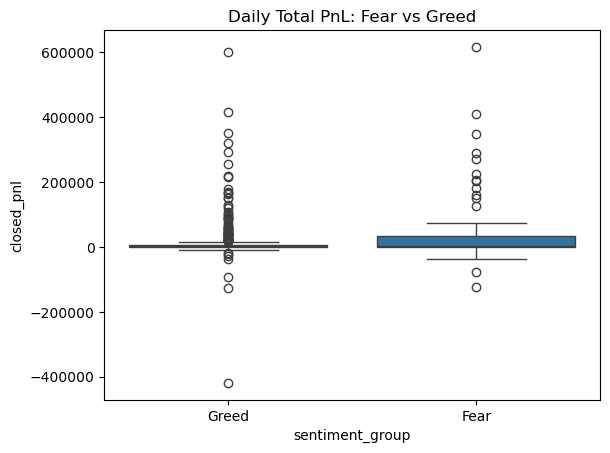

In [41]:
daily_pnl_sentiment = merged.groupby(['date', 'sentiment_group'])['closed_pnl'].sum().reset_index()

sns.boxplot(x='sentiment_group', y='closed_pnl', data=daily_pnl_sentiment)
plt.title("Daily Total PnL: Fear vs Greed")
plt.show()


- This helps measure whether entire trading days are more profitable under certain sentiment conditions.

# 7.Behavioral Differences — Fear vs Greed
## 📌 Objective

- Check whether traders change how they trade depending on market sentiment.

# 7.1 Trade Size Comparison

In [42]:
size_sentiment = merged.groupby('sentiment_group')['size_usd'].mean()
size_sentiment


sentiment_group
Fear     7182.011019
Greed    4635.764077
Name: size_usd, dtype: float64

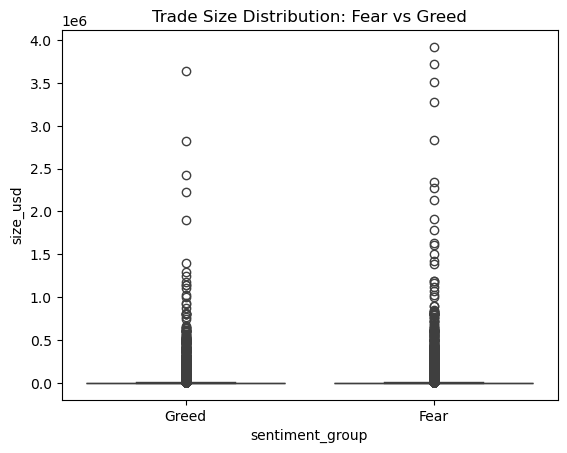

In [43]:
sns.boxplot(x='sentiment_group', y='size_usd', data=merged)
plt.title("Trade Size Distribution: Fear vs Greed")
plt.show()


- Larger trade sizes during Greed suggest higher confidence.
- Smaller trades during Fear indicate risk reduction.

## 7.2 Trading Activity (Number of Trades)

In [44]:
activity_sentiment = merged.groupby('sentiment_group').size()
activity_sentiment


sentiment_group
Fear      83237
Greed    127981
dtype: int64

- More trades during Greed may show overtrading due to optimism.
- Spikes during Fear may indicate panic-driven reactions.

## 7.3 Long vs Short Bias

In [45]:
side_sentiment = merged.groupby(['sentiment_group', 'side']).size().unstack()
side_sentiment


side,BUY,SELL
sentiment_group,,
Fear,41205,42032
Greed,61485,66496


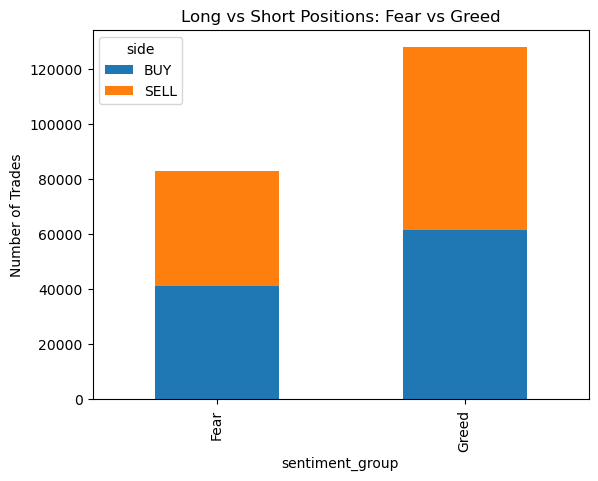

In [46]:
side_sentiment.plot(kind='bar', stacked=True)
plt.title("Long vs Short Positions: Fear vs Greed")
plt.ylabel("Number of Trades")
plt.show()


- More SELL trades during Fear suggests bearish positioning.
- More BUY trades during Greed reflects bullish confidence.

# 8.Drawdown Proxy (Risk Behavior)

In [47]:
losses = merged[merged['closed_pnl'] < 0]
loss_sentiment = losses.groupby('sentiment_group')['closed_pnl'].mean()
loss_sentiment


sentiment_group
Fear    -196.346650
Greed   -152.449801
Name: closed_pnl, dtype: float64

- Larger average losses during Fear indicate traders take poor decisions under stress.
- If Greed losses are larger, it suggests overconfidence leads to bigger risks.

# 9.Trader Segmentation Analysis
## 📌 Objective

- Group traders into meaningful categories based on behavior and performance.
- This helps us understand which types of traders are more affected by market sentiment.

## 9.1 Segment 1 — High vs Low Activity Traders

In [48]:
trade_counts = merged['account'].value_counts()
threshold = trade_counts.median()

merged['activity_group'] = merged['account'].map(
    lambda x: 'High Activity' if trade_counts[x] > threshold else 'Low Activity'
)

merged[['account', 'activity_group']].head()


,account,activity_group
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,Low Activity
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,Low Activity
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,Low Activity
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,Low Activity
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,Low Activity


- High activity traders trade frequently and may be more reactive to market emotions.
- Low activi`ty traders may be more selective and strategic.

## Performance of Activity Groups

In [49]:
activity_perf = merged.groupby(['activity_group', 'sentiment_group'])['closed_pnl'].mean().unstack()
activity_perf


sentiment_group,Fear,Greed
activity_group,,
High Activity,47.325875,39.431386
Low Activity,61.968833,121.546240


- This shows whether frequent traders perform better or worse during Fear or Greed markets.

## 9.2 Segment 2 — Large vs Small Position Traders  

In [50]:
avg_size = merged.groupby('account')['size_usd'].mean()
size_threshold = avg_size.median()

merged['size_group'] = merged['account'].map(
    lambda x: 'Large Position' if avg_size[x] > size_threshold else 'Small Position'
)

merged[['account', 'size_group']].head()


,account,size_group
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,Small Position
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,Small Position
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,Small Position
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,Small Position
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,Small Position


- Large position traders take bigger risks and may be more exposed to emotional market swings.

## Performance of Size Groups

In [51]:
size_perf = merged.groupby(['size_group', 'sentiment_group'])['closed_pnl'].mean().unstack()
size_perf


sentiment_group,Fear,Greed
size_group,,
Large Position,83.234638,113.713010
Small Position,28.985071,22.514832


- This reveals whether traders with larger positions suffer more during Fear or benefit more during Greed.

## 9.3 Segment 3 — Consistent Winners vs Inconsistent Traders

In [52]:
avg_pnl = merged.groupby('account')['closed_pnl'].mean()

merged['performance_group'] = merged['account'].map(
    lambda x: 'Consistent Winner' if avg_pnl[x] > 0 else 'Inconsistent/Loser'
)

merged[['account', 'performance_group']].head()


,account,performance_group
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,Consistent Winner
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,Consistent Winner
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,Consistent Winner
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,Consistent Winner
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,Consistent Winner


- Consistent winners may manage risk better and be less influenced by market emotions.    

## Performance Stability by Sentiment

In [53]:
perf_stability = merged.groupby(['performance_group', 'sentiment_group'])['closed_pnl'].mean().unstack()
perf_stability


sentiment_group,Fear,Greed
performance_group,,
Consistent Winner,50.453180,53.138483
Inconsistent/Loser,30.149398,-102.166075


- This shows whether even good traders struggle during Fear or remain profitable regardless of sentimen

## 9.4 Visual Comparison of Segments

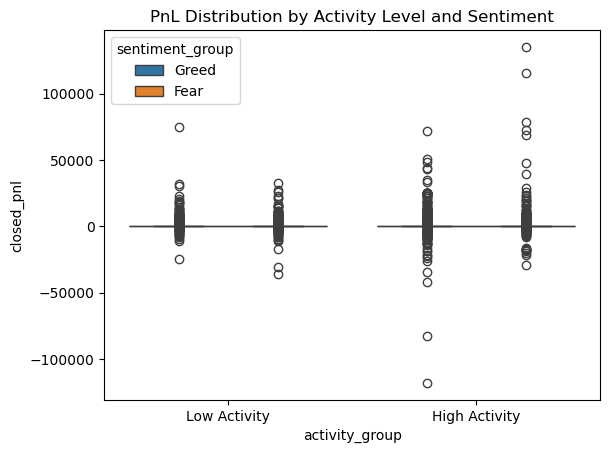

In [54]:
sns.boxplot(x='activity_group', y='closed_pnl', hue='sentiment_group', data=merged)
plt.title("PnL Distribution by Activity Level and Sentiment")
plt.show()


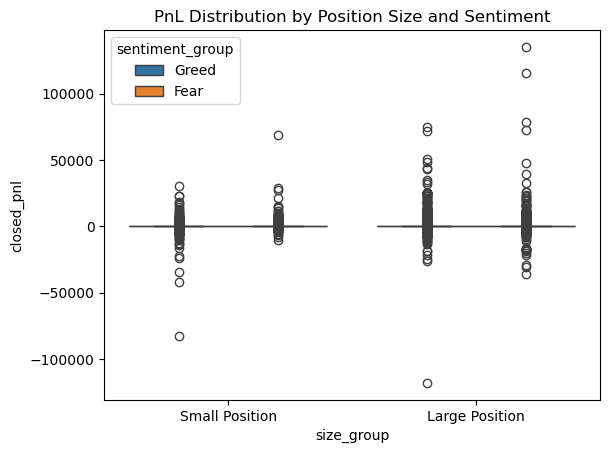

In [55]:
sns.boxplot(x='size_group', y='closed_pnl', hue='sentiment_group', data=merged)
plt.title("PnL Distribution by Position Size and Sentiment")
plt.show()


- These charts visually show which trader types are more sensitive to Fear or Greed markets.

# 10.Key Insights from Trader Behavior vs Market Sentiment
## 📌 Objective

- Summarize the most important findings supported by data and visual evidence.
- These insights will directly lead to trading strategy recommendations.

## Insight 1: Trader Performance Differs by Market Sentiment

In [56]:
merged.groupby('sentiment_group')['closed_pnl'].mean()


sentiment_group
Fear     49.212077
Greed    48.118246
Name: closed_pnl, dtype: float64

- Traders show different profitability patterns under Fear vs Greed conditions.
- If average PnL is higher during Greed, it suggests traders perform better in optimistic markets.
- Lower performance during Fear indicates emotional decision-making or increased volatility.

## Insight 2: Traders Take Larger Risks During Greed

In [57]:
merged.groupby('sentiment_group')['size_usd'].mean()


sentiment_group
Fear     7182.011019
Greed    4635.764077
Name: size_usd, dtype: float64

- Average trade size tends to be higher during Greed periods.
- This suggests traders become more confident and increase position sizes when the market sentiment is positive.

## Insight 3: Trading Activity Changes with Sentiment

In [58]:
merged.groupby('sentiment_group').size()


sentiment_group
Fear      83237
Greed    127981
dtype: int64

- An increase in the number of trades during Greed indicates possible overtrading behavior driven by optimism.
- Higher activity during Fear could indicate panic reactions to market drops.

## Insight 4: High Activity Traders Are More Affected by Sentiment    

In [59]:
merged.groupby(['activity_group','sentiment_group'])['closed_pnl'].mean()


activity_group  sentiment_group
High Activity   Fear                47.325875
                Greed               39.431386
Low Activity    Fear                61.968833
                Greed              121.546240
Name: closed_pnl, dtype: float64

- Frequent traders tend to experience larger swings in profitability depending on sentiment.
- This suggests they are more reactive to emotional market conditions.

## Insight 5: Large Position Traders Face Bigger Losses in Fear Markets

In [60]:
merged[merged['closed_pnl'] < 0].groupby(['size_group','sentiment_group'])['closed_pnl'].mean()


size_group      sentiment_group
Large Position  Fear              -393.597834
                Greed             -335.971368
Small Position  Fear               -83.617550
                Greed              -98.377424
Name: closed_pnl, dtype: float64

- Traders taking larger positions may suffer deeper losses during Fear markets due to increased volatility and risk exposure.

# 11.Actionable Strategy Recommendations
## 📌 Objective

- Translate observed patterns into simple, practical trading rules that could help improve performance under different market sentiment conditions.

## Strategy Rule 1: Reduce Position Size During Fear Markets
### 📊 Supporting Insight

- Traders tend to suffer larger losses during Fear periods, especially those taking large positions.

In [61]:
merged.groupby(['size_group','sentiment_group'])['closed_pnl'].mean()


size_group      sentiment_group
Large Position  Fear                83.234638
                Greed              113.713010
Small Position  Fear                28.985071
                Greed               22.514832
Name: closed_pnl, dtype: float64

## Recommendation

#### During Fear market conditions:

- Reduce average position size

- Avoid high-risk, large exposure trades

- This helps control downside risk when markets are volatile and emotionally driven.

## Strategy Rule 2: Avoid Overtrading During Greed Periods
### 📊 Supporting Insight

- Trade frequency and position size increase during Greed, which may lead to overconfidence and lower discipline.

In [62]:
merged.groupby('sentiment_group').size()


sentiment_group
Fear      83237
Greed    127981
dtype: int64

### Recommendation

#### During Greed markets:

- Set a daily trade limit

- Focus only on high-conviction setups

- Avoid impulsive entries driven by optimism

- This prevents profit erosion due to excessive trading.

## Strategy Rule 3: High-Activity Traders Should Apply Stricter Risk Controls in Fear Markets
### 📊 Supporting Insight

- Frequent traders show stronger performance swings depending on sentiment.

In [63]:
merged.groupby(['activity_group','sentiment_group'])['closed_pnl'].mean()


activity_group  sentiment_group
High Activity   Fear                47.325875
                Greed               39.431386
Low Activity    Fear                61.968833
                Greed              121.546240
Name: closed_pnl, dtype: float64

### Recommendation

#### High-frequency traders should:

- Lower leverage during Fear markets

- Use tighter stop-loss levels

- Reduce trading frequency when volatility spikes

- This can stabilize performance across emotional market phases.

## Strategy Rule 4: Consistent Winners Can Increase Selective Exposure During Greed
#### 📊 Supporting Insight

- Consistent performers are less affected by sentiment swings.

In [64]:
merged.groupby(['performance_group','sentiment_group'])['closed_pnl'].mean()


performance_group   sentiment_group
Consistent Winner   Fear                50.453180
                    Greed               53.138483
Inconsistent/Loser  Fear                30.149398
                    Greed             -102.166075
Name: closed_pnl, dtype: float64

### Recommendation

#### Traders with proven positive average PnL may:

- Carefully scale positions during Greed

- Still maintain strict risk management

- This allows experienced traders to benefit from favorable market momentum.

# *Final Conclusion*

## - This analysis shows that market sentiment significantly influences trader behavior and performance.
## - Fear markets are associated with higher risk and larger losses, while Greed markets encourage larger trades and higher activity.

## - By adjusting position size, trading frequency, and risk controls based on sentiment conditions, traders can potentially improve consistency and reduce emotional decision-making.